In [12]:
import numpy as np
import pandas as pd
import functions as funs
import model as mod
import sampler as samp
import matplotlib.pyplot as plt
import numpy.random as rand

In [30]:
myData_tot = funs.dataObject('tot')
myData_stat = funs.dataObject('stat')

num_chains = 10
len_chains = 15000

In [35]:
# sigmas in the generating function for uniform prior on M
sigmas1 = [2,0.02,0.05,0.25]

chains_tot_gaussian = []
chains_stat_gaussian = []

for i in range(0,num_chains):
    chains_tot_gaussian.append(samp.mcmc_sampler(myData_tot,len_chains,sigmas=sigmas1,prior='gaussian'))
    chains_stat_gaussian.append(samp.mcmc_sampler(myData_stat,len_chains,sigmas=sigmas1,prior='gaussian'))

/home/feige/anaconda3/lib/python3.7/site-packages/astropy/cosmology/core.py:1251: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  args=self._inv_efunc_scalar_args)[0]
/home/feige/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [39]:
# sigmas in the generating function for uniform prior on M
sigmas2 = [22,0.02,0.05,0.25]

chains_tot_uniform = []
chains_stat_uniform = []

for i in range(0,num_chains):
    chains_tot_uniform.append(samp.mcmc_sampler(myData_tot,len_chains,sigmas=sigmas2,prior='uniform'))
    chains_stat_uniform.append(samp.mcmc_sampler(myData_stat,len_chains,sigmas=sigmas2,prior='uniform'))

/home/feige/anaconda3/lib/python3.7/site-packages/astropy/cosmology/core.py:1251: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  args=self._inv_efunc_scalar_args)[0]
/home/feige/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


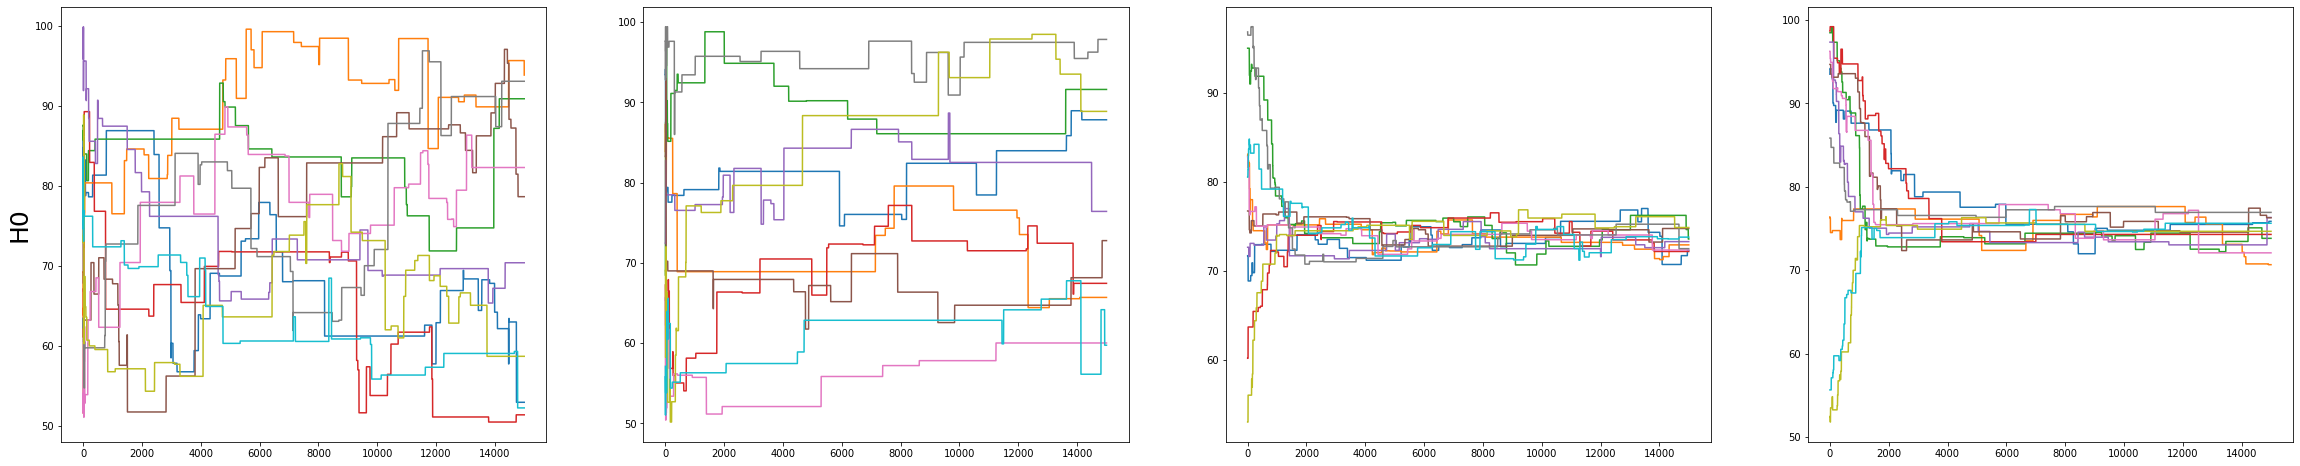

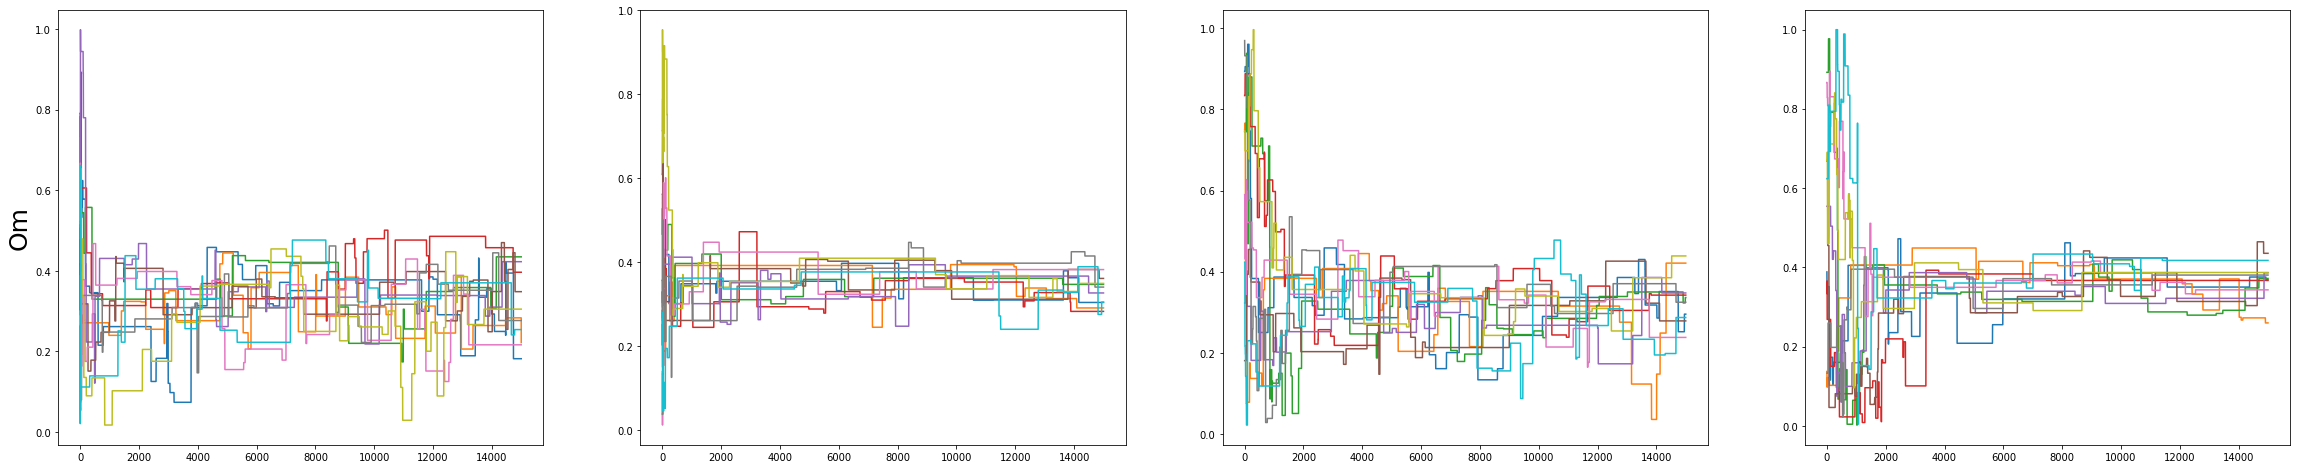

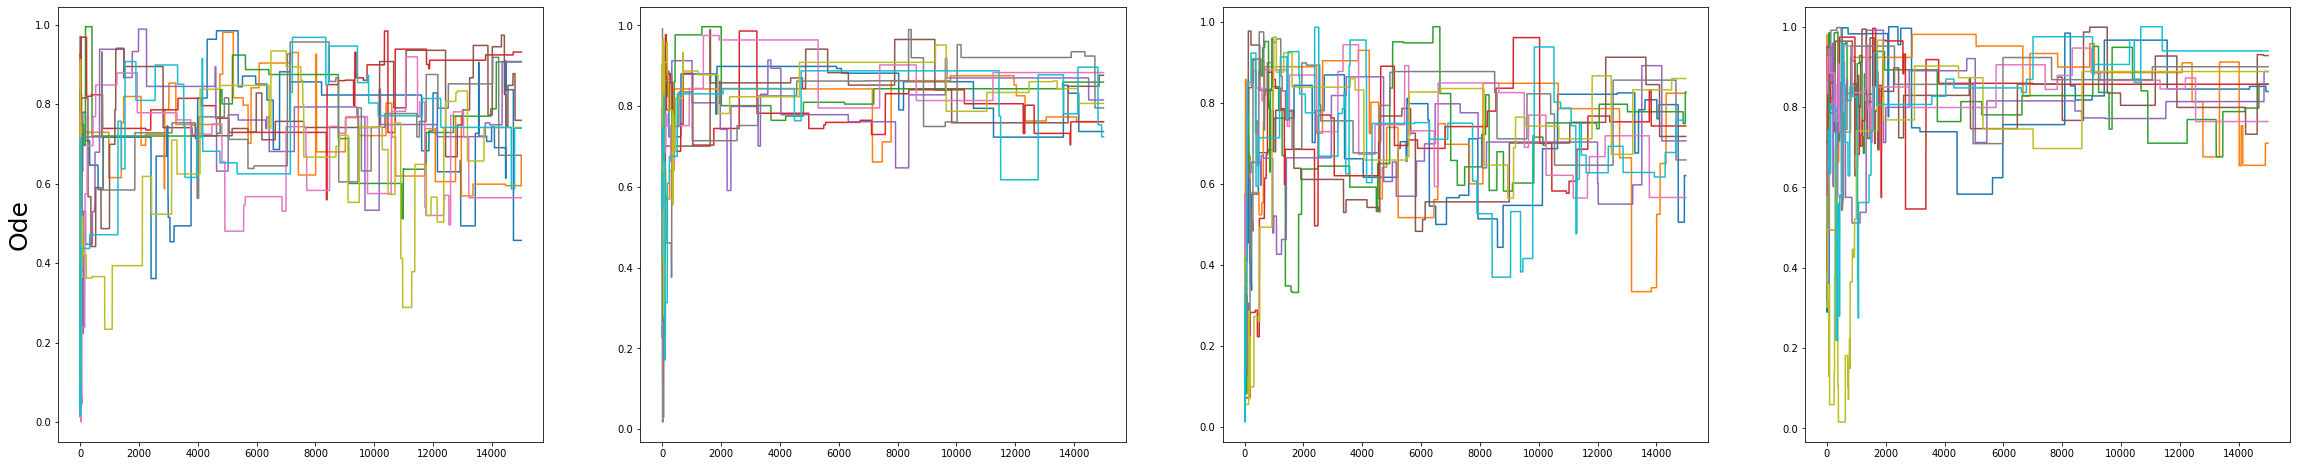

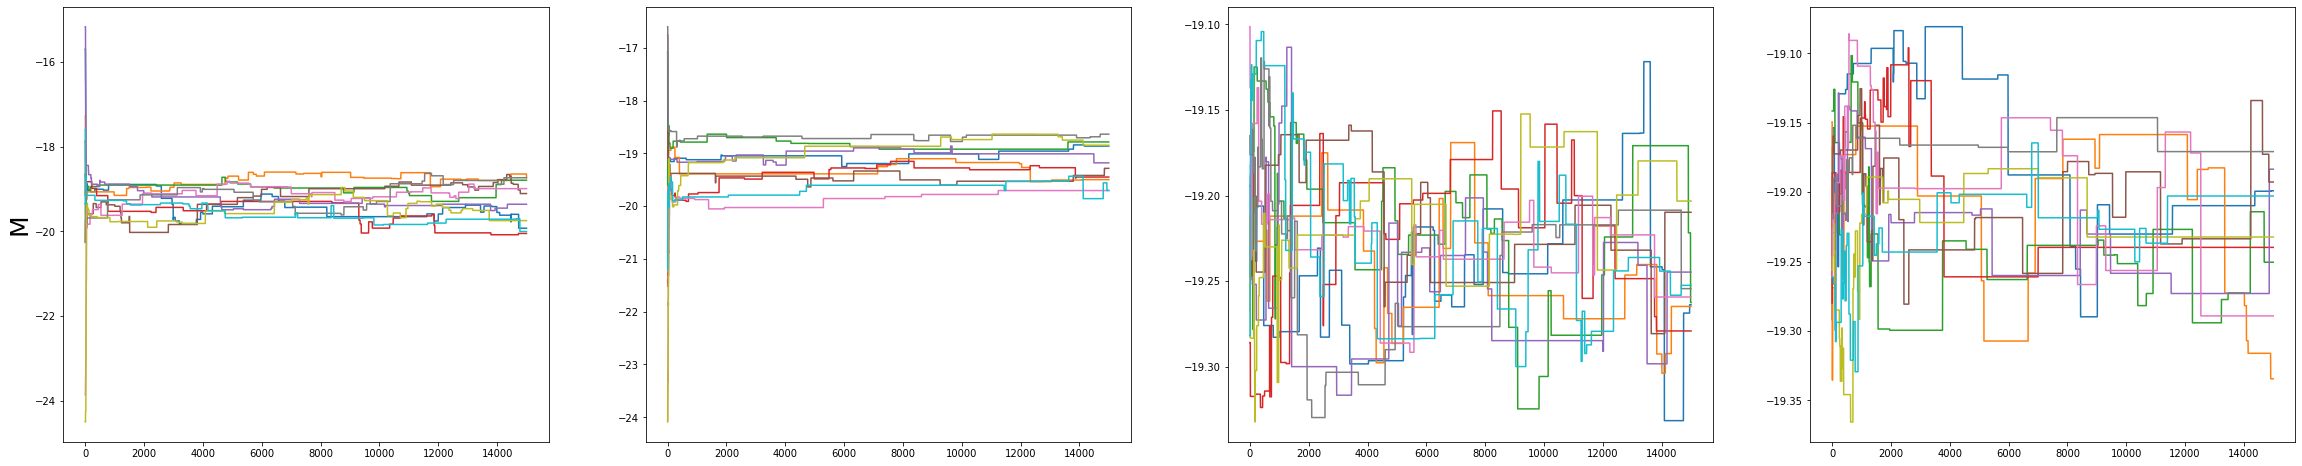

In [40]:
names = ['H0', 'Om', 'Ode','M']

for i in range(4):

    fig, ax = plt.subplots(1,4,figsize=(40,8))

    for (j,chains) in enumerate([chains_tot_uniform, chains_stat_uniform, chains_tot_gaussian, chains_stat_gaussian]):

        for chain in chains:
            ax[j].plot(chain[:,i])

    ax[0].set_ylabel(names[i], fontsize=25)

    plt.show()

In [28]:
names = ['H0', 'Om', 'Ode','M']
labels = ['H_0 [km/s/Mpc]', '\Omega_m', '\Omega_{\Lambda}', 'M']

Removed 0.3 as burn in
Removed 0.3 as burn in
Removed 0.3 as burn in
Removed 0.3 as burn in


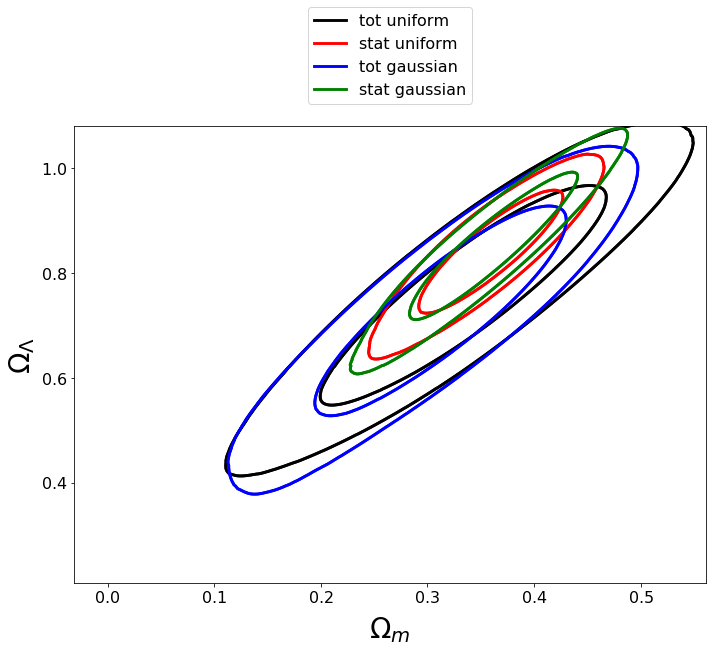

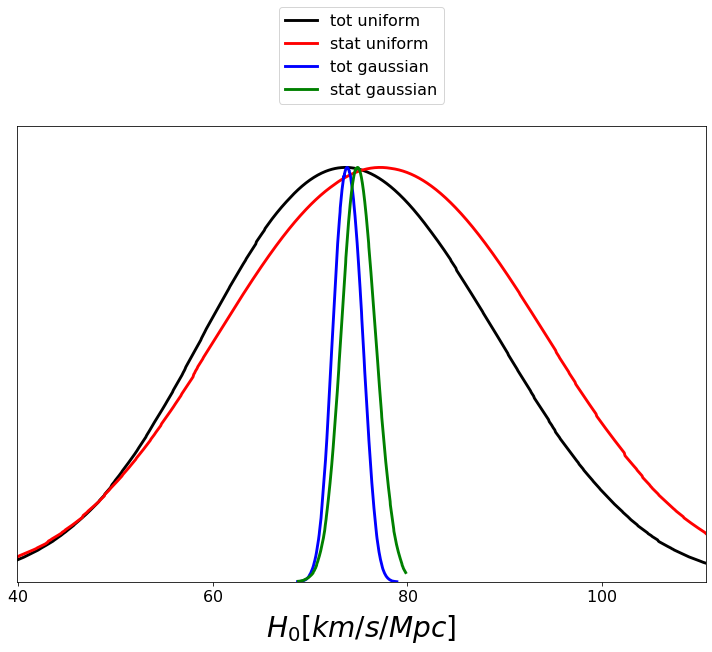

In [41]:
ch1 = funs.make_plot([chains_tot_uniform, chains_stat_uniform, chains_tot_gaussian, chains_stat_gaussian], legend=['tot uniform','stat uniform','tot gaussian','stat gaussian'], label=labels, name=names, burn_in=0.3)
ch1.plot_2d([1,2])
ch1.plot_1d()

Removed 0.3 as burn in
Removed 0.3 as burn in


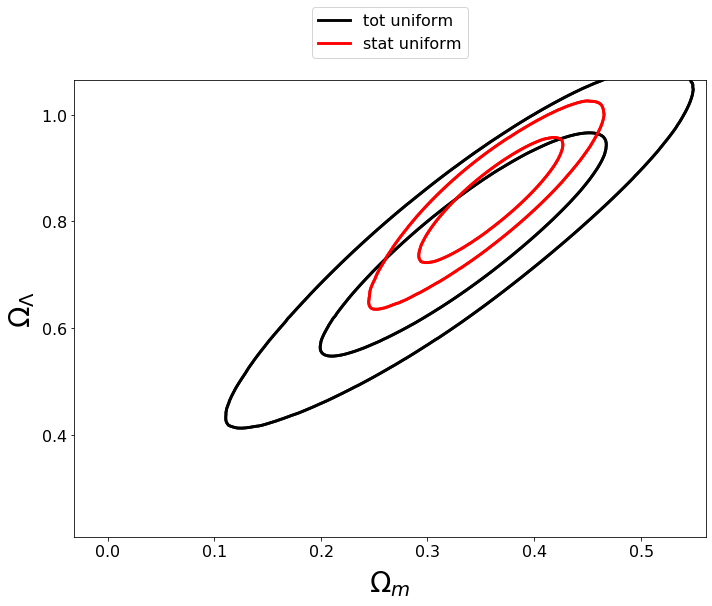

In [42]:
ch1 = funs.make_plot([chains_tot_uniform, chains_stat_uniform], legend=['tot uniform','stat uniform'], label=labels, name=names, burn_in=0.3)
ch1.plot_2d([1,2])

Removed 0.3 as burn in
Removed 0.3 as burn in


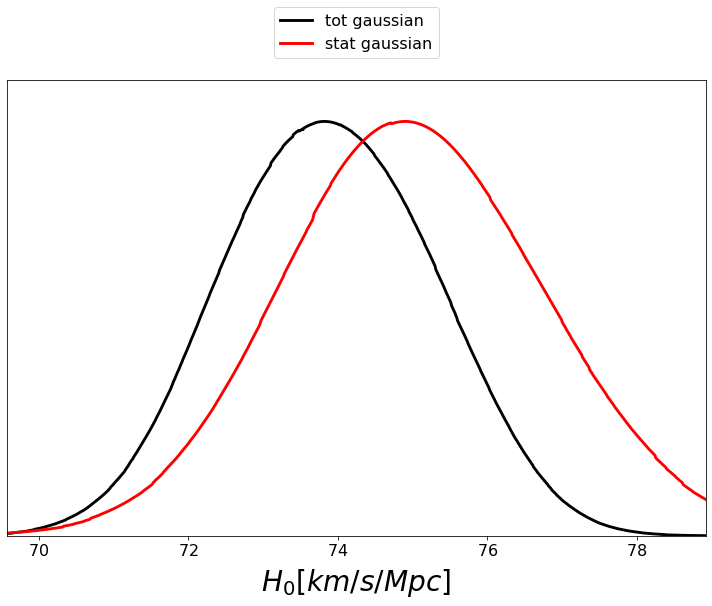

In [43]:
ch1 = funs.make_plot([chains_tot_gaussian, chains_stat_gaussian], legend=['tot gaussian','stat gaussian'], label=labels, name=names, burn_in=0.3)
ch1.plot_1d()